# Exploring alcohol-related content on Twitter

In [1]:
import json
import pandas as pd
from langdetect import detect

tweets = []
for line in open('twitter-@alcohol.json', 'r'):
    tweets.append(json.loads(line))

twitter_content = []
twitter_user = []

for tweet in tweets:
    if detect(tweet["content"]) == "en":
        twitter_content.append(tweet["content"])
        twitter_user.append(tweet["user"]["id"])

In [2]:
data = pd.DataFrame()
data["content"] = twitter_content
data["user_id"] = twitter_user
data

,content,user_id
0,#affiliate #gift #affiliatemarketing #deal #bl...,617853906
1,#affiliate #gift #affiliatemarketing #deal #bl...,617853906
2,#affiliate #gift #affiliatemarketing #bitcoin ...,617853906
3,#affiliate #gift #affiliatemarketing #deal #bl...,617853906
4,This is #SHOCKING\nSeems like the #UsualSuspec...,83592751
...,...,...
4594,#affiliate #affiliatemarketing #deal #blogger ...,617853906
4595,#affiliate #affiliatemarketing #deal #blogger ...,617853906
4596,#affiliate #affiliatemarketing #deal #blogger ...,617853906
4597,#affiliate #affiliatemarketing #deal #blogger ...,617853906


remove stopwords

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize.casual import TweetTokenizer
import string

STOP_PREFIXES = ("@", "http", "&amp")

def clean_text(comment):
    words = []

    for word in TweetTokenizer().tokenize(comment):
        if word not in list(string.punctuation) and word not in stopwords.words("english") and not word.startswith(STOP_PREFIXES):
            words.append(word)
    
    return (" ").join(words)

data["content"] = data["content"].apply(clean_text)
data

,content,user_id
0,#affiliate #gift #affiliatemarketing #deal #bl...,617853906
1,#affiliate #gift #affiliatemarketing #deal #bl...,617853906
2,#affiliate #gift #affiliatemarketing #bitcoin ...,617853906
3,#affiliate #gift #affiliatemarketing #deal #bl...,617853906
4,This #SHOCKING Seems like #UsualSuspects #Jiha...,83592751
...,...,...
4594,#affiliate #affiliatemarketing #deal #blogger ...,617853906
4595,#affiliate #affiliatemarketing #deal #blogger ...,617853906
4596,#affiliate #affiliatemarketing #deal #blogger ...,617853906
4597,#affiliate #affiliatemarketing #deal #blogger ...,617853906


Text(0.5, 1.0, 'Twitter')

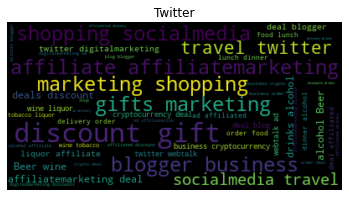

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = " ".join(data["content"].values)
word_cloud = WordCloud().generate(words)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Twitter")

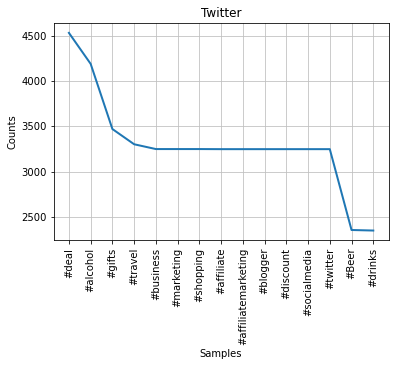

"['#deal', '#alcohol', '#gifts', '#travel', '#business', '#marketing', '#shopping', '#affiliate', '#affiliatemarketing', '#blogger', '#discount', '#socialmedia', '#twitter', '#Beer', '#drinks', '#wine', '#liquor', '#deals', '#ad', '#affiliated']"

In [5]:
from nltk.probability import FreqDist

freq = FreqDist(words.split(" "))
freq.plot(15, cumulative=False, title="Twitter")
str(list(freq)[:20])

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def find_positive(comment):
    return sia.polarity_scores(comment)["pos"]

def find_neutral(comment):
    return sia.polarity_scores(comment)["neu"]

def find_negative(comment):
    return sia.polarity_scores(comment)["neg"]

def find_compound(comment):
    return sia.polarity_scores(comment)["compound"]

data["Positive"] = data["content"].apply(find_positive)
data["Neutral"] = data["content"].apply(find_neutral)
data["Negative"] = data["content"].apply(find_negative)
data["Compound"] = data["content"].apply(find_compound)
data

,content,user_id,Positive,Neutral,Negative,Compound
0,#affiliate #gift #affiliatemarketing #deal #bl...,617853906,0.000,1.000,0.0,0.0000
1,#affiliate #gift #affiliatemarketing #deal #bl...,617853906,0.000,1.000,0.0,0.0000
2,#affiliate #gift #affiliatemarketing #bitcoin ...,617853906,0.000,1.000,0.0,0.0000
3,#affiliate #gift #affiliatemarketing #deal #bl...,617853906,0.000,1.000,0.0,0.0000
4,This #SHOCKING Seems like #UsualSuspects #Jiha...,83592751,0.094,0.906,0.0,0.3612
...,...,...,...,...,...,...
4594,#affiliate #affiliatemarketing #deal #blogger ...,617853906,0.000,1.000,0.0,0.0000
4595,#affiliate #affiliatemarketing #deal #blogger ...,617853906,0.000,1.000,0.0,0.0000
4596,#affiliate #affiliatemarketing #deal #blogger ...,617853906,0.000,1.000,0.0,0.0000
4597,#affiliate #affiliatemarketing #deal #blogger ...,617853906,0.000,1.000,0.0,0.0000


In [8]:
print("The mean positive sentiment score: {}".format(data["Positive"].mean()))
print("The mean negative sentiment score: {}".format(data["Negative"].mean()))
print("The mena neutral sentiment score: {}".format(data["Neutral"].mean()))
print("The mean compound sentiment score: {}".format(data["Compound"].mean()))

The mean positive sentiment score: 0.034672972385301155
The mean negative sentiment score: 0.023756468797564666
The mena neutral sentiment score: 0.9415688193085456
The mean compound sentiment score: 0.026897195042400485
